<a href="https://colab.research.google.com/github/claudioqnto/DeepLearning_Tranfer_Learning_COLAB/blob/main/TranferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJETO PROPOSTO PELA DIO
tranfer_learning usando o modelo pré-treinado MobileNetV2 Imagenet

In [12]:
pip install tensorflow matplotlib

In [1]:
#Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Montar o Drive
from google.colab import drive
drive.mount('/content/drive')

#Caminho do dataset em MyDrive (google)
dataset_dir = "/content/drive/MyDrive/PetImages"

#Pré-processamento
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_ds = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training',
    class_mode='binary'
)

val_ds = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='binary'
)

#Modelo pré-treinado (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')#função de ativação
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#Treinamento
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5 #epochs
)

#Avaliação
loss, acc = model.evaluate(val_ds)
print(f"Acurácia: {acc*100:.2f}%")

#Salvando modelo retreinado
model.save('/content/drive/MyDrive/PetImages/cats_vs_dogs_model.h5')


Mounted at /content/drive
Found 1318 images belonging to 2 classes.
Found 328 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step - accuracy: 0.8907 - loss: 0.2254 - val_accuracy: 0.9726 - val_loss: 0.0626
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9726 - val_loss: 0.0859
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.9956 - loss: 0.0160 - val_accuracy: 0.9695 - val_loss: 0.0876
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.9957 - loss: 0.0106 - val_accuracy: 0.9726 - val_loss: 0.0806
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.9999 - loss: 0.0045 - val_accuracy: 0.9726 - val_loss: 0.0840
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9618 - loss: 0.1090


Acurácia: 97.26%


TESTANDO

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


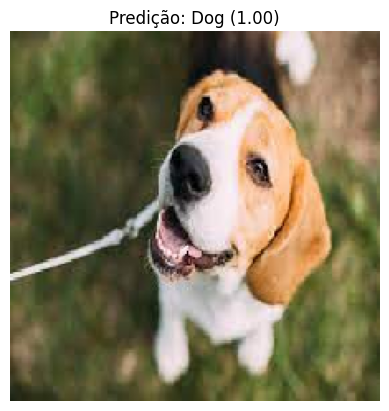

Resultado: Dog


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

#carregar modelo treinado
model = tf.keras.models.load_model('/content/drive/MyDrive/PetImages/cats_vs_dogs_model.h5')

#Função para carregar e prever uma imagem
def predict_image(img_path, model, img_size=(224,224)):
    # carrega normaliza e redimensiona
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    #previsão
    prediction = model.predict(img_array)[0][0]
    class_names = ['Cat', 'Dog']
    predicted_class = class_names[int(prediction > 0.5)]

    # resultado
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predição: {predicted_class} ({prediction:.2f})")
    plt.show()

    return predicted_class

# Com imagem do drivee
img_path = "/content/drive/MyDrive/teste/cachorro.jpeg"  # coloque o caminho da imagem
#chama a função e carrega o caminho como parâmertro
resultado = predict_image(img_path, model)
print("Resultado:", resultado)
